**Homework#3**

# First steps with TensorFlow

In [107]:
import tensorflow as tf
x = tf.ones(shape=(3, 3))
print(x)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [108]:
x = tf.zeros(shape=(3, 3))
print(x)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [109]:
x = tf.random.normal(shape=(3, 3), mean=1., stddev=2.)
print(x)

tf.Tensor(
[[ 2.6475887   2.9034224  -0.8176501 ]
 [-2.2187564  -0.8870115   0.5973697 ]
 [ 1.9022015  -0.65037656 -1.9148772 ]], shape=(3, 3), dtype=float32)


In [110]:
x = tf.random.uniform(shape=(3, 3), minval=1., maxval=2.)
print(x)

tf.Tensor(
[[1.2236775 1.9333276 1.011302 ]
 [1.1029236 1.717318  1.3235538]
 [1.5051866 1.594111  1.5065299]], shape=(3, 3), dtype=float32)


In [111]:
import numpy as np
x = np.ones(shape=(3, 3))
x[0, 0] = 0.

In [112]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.98102593,  1.1105415 , -0.6534015 ],
       [-0.5648198 ,  0.6572673 ,  1.0763851 ],
       [-1.7902279 ,  0.10052426,  0.6678849 ]], dtype=float32)>


In [113]:
v.assign(tf.ones((3, 3)))

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [114]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[3., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [115]:
v.assign_add(tf.ones((3, 3)))

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[4., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [116]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [117]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [118]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [119]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [120]:
num_samples_per_class = 500
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [121]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [122]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

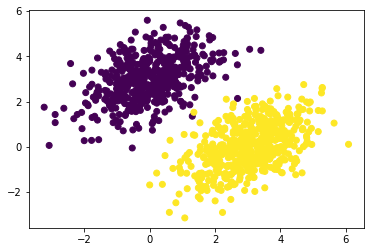

In [123]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [124]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [125]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [126]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [127]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [128]:
for step in range(30):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.3910
Loss at step 1: 0.7232
Loss at step 2: 0.2263
Loss at step 3: 0.1464
Loss at step 4: 0.1271
Loss at step 5: 0.1173
Loss at step 6: 0.1093
Loss at step 7: 0.1022
Loss at step 8: 0.0958
Loss at step 9: 0.0899
Loss at step 10: 0.0844
Loss at step 11: 0.0795
Loss at step 12: 0.0749
Loss at step 13: 0.0708
Loss at step 14: 0.0669
Loss at step 15: 0.0635
Loss at step 16: 0.0603
Loss at step 17: 0.0573
Loss at step 18: 0.0546
Loss at step 19: 0.0522
Loss at step 20: 0.0499
Loss at step 21: 0.0479
Loss at step 22: 0.0460
Loss at step 23: 0.0443
Loss at step 24: 0.0427
Loss at step 25: 0.0412
Loss at step 26: 0.0399
Loss at step 27: 0.0387
Loss at step 28: 0.0376
Loss at step 29: 0.0366


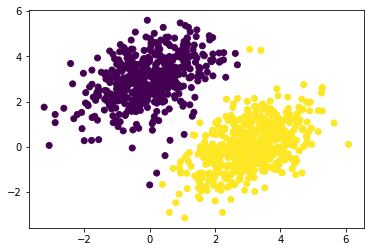

In [129]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

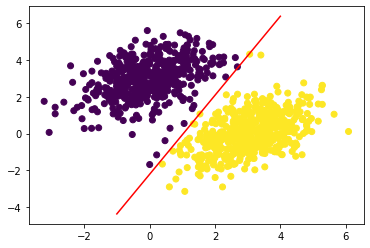

In [130]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Anatomy of a neural network: Understanding core Keras APIs

In [131]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [132]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [133]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [134]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [135]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [136]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [137]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [138]:
history = model.fit(
    inputs,
    targets,
    epochs=10,
    batch_size=128
)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 4.7164 - binary_accuracy: 0.9500
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 4.5596 - binary_accuracy: 0.9500
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 4.4395 - binary_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 4.3296 - binary_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 4.2237 - binary_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 4.1213 - binary_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 4.0200 - binary_accuracy: 0.9500
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 3.9202 - binary_accuracy: 0.9500
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 3.8214 - binary_accuracy: 0.9490
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 3.

In [139]:
history.history

{'loss': [4.716438293457031,
  4.559576988220215,
  4.439479351043701,
  4.329608917236328,
  4.223731517791748,
  4.121263027191162,
  4.020012855529785,
  3.9201836585998535,
  3.821441411972046,
  3.7246148586273193],
 'binary_accuracy': [0.949999988079071,
  0.949999988079071,
  0.949999988079071,
  0.949999988079071,
  0.949999988079071,
  0.949999988079071,
  0.949999988079071,
  0.949999988079071,
  0.9490000009536743,
  0.9490000009536743]}

In [140]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=10,
    batch_size=8,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/10
88/88 [==============================] - 1s 3ms/step - loss: 0.4888 - binary_accuracy: 0.8914 - val_loss: 0.0319 - val_binary_accuracy: 0.9967
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0801 - binary_accuracy: 0.9514 - val_loss: 0.0683 - val_binary_accuracy: 0.9600
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0749 - binary_accuracy: 0.9643 - val_loss: 0.0910 - val_binary_accuracy: 0.9733
Epoch 4/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0860 - binary_accuracy: 0.9414 - val_loss: 0.0427 - val_binary_accuracy: 0.9867
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0726 - binary_accuracy: 0.9643 - val_loss: 0.2682 - val_binary_accuracy: 0.8267
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0758 - binary_accuracy: 0.9586 - val_loss: 0.0348 - val_binary_accuracy: 0.9967
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.07

In [141]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:20])

[[ 1.2500818 ]
 [ 0.19565275]
 [ 1.0528705 ]
 [-0.04739684]
 [ 1.2254004 ]
 [ 1.0321712 ]
 [ 0.22119978]
 [ 0.04567987]
 [ 1.1971226 ]
 [ 0.09187686]
 [ 0.9605894 ]
 [ 1.0448471 ]
 [ 1.4677291 ]
 [ 0.1732212 ]
 [ 0.05011201]
 [ 1.2181824 ]
 [ 0.9871405 ]
 [ 1.2458632 ]
 [ 1.2160438 ]
 [-0.05894446]]
